In [56]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [57]:
dataset = 'model/two_hands_keypoint_classifier/two_hands_keypoint.csv'
model_save_path = 'model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5'

# 分類数設定

In [58]:
NUM_CLASSES = 4

# 学習データ読み込み

In [59]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2 * 2) + 1)))

In [60]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2 * 2, )),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [63]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_9 (Dropout)         (None, 84)                0         
                                                                 
 dense_12 (Dense)            (None, 60)                5100      
                                                                 
 dropout_10 (Dropout)        (None, 60)                0         
                                                                 
 dense_13 (Dense)            (None, 20)                1220      
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
 dense_15 (Dense)            (None, 4)                

In [64]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [65]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [66]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


16/16 [==============================] - ETA: 0s - loss: 162.3667 - accuracy: 0.2284 
Epoch 1: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
16/16 [==============================] - 2s 23ms/step - loss: 162.3667 - accuracy: 0.2284 - val_loss: 8.1913 - val_accuracy: 0.2715
Epoch 2/1000
 1/16 [>.............................] - ETA: 0s - loss: 51.1522 - accuracy: 0.1797
Epoch 2: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
16/16 [==============================] - 0s 7ms/step - loss: 37.9158 - accuracy: 0.2458 - val_loss: 7.4006 - val_accuracy: 0.2715
Epoch 3/1000
 1/16 [>.............................] - ETA: 0s - loss: 20.8251 - accuracy: 0.2891

/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
16/16 [==============================] - 0s 10ms/step - loss: 20.4801 - accuracy: 0.2632 - val_loss: 1.7695 - val_accuracy: 0.2715
Epoch 4/1000
14/16 [=========================>....] - ETA: 0s - loss: 14.2060 - accuracy: 0.2673
Epoch 4: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 14.1049 - accuracy: 0.2678 - val_loss: 1.3268 - val_accuracy: 0.2914
Epoch 5/1000
 9/16 [===============>..............] - ETA: 0s - loss: 10.6753 - accuracy: 0.2812
Epoch 5: saving model to model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.hdf5
16/16 [==============================] - 0s 13ms/step - loss: 10.8096 - accuracy: 0.2785 - val_loss: 1.5344 - val_accuracy: 0.3144
Epoch 6/1000
13/16 [=======================>......] - ETA: 0s - loss: 9.4526 - accuracy: 0.2674 
Epoch 6: saving model to mo

In [67]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 4ms/step - loss: 1.3734 - accuracy: 0.3144


In [68]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [69]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 85ms/step
[0.24570267 0.2262055  0.22952698 0.29856485]
3


# 混同行列

21/21 [==============================] - 0s 1ms/step


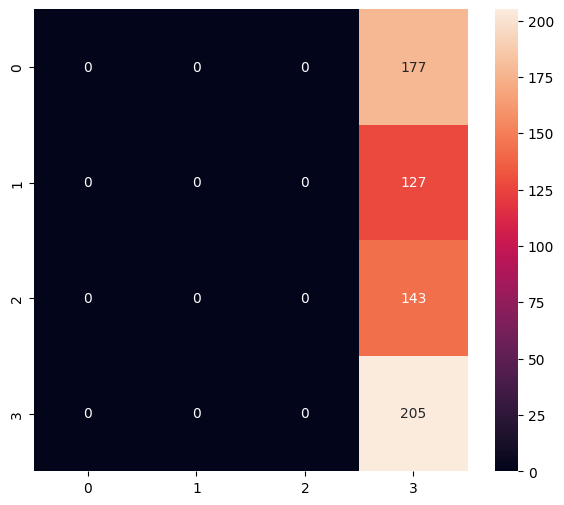

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.00      0.00      0.00       127
           2       0.00      0.00      0.00       143
           3       0.31      1.00      0.48       205

    accuracy                           0.31       652
   macro avg       0.08      0.25      0.12       652
weighted avg       0.10      0.31      0.15       652



/tmp/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [71]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
# モデルを変換(量子化)
tflite_save_path = 'model/two_hands_keypoint_classifier/two_hands_keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpn1hk2v1t/assets


INFO:tensorflow:Assets written to: /tmp/tmpn1hk2v1t/assets
2024-01-09 10:37:41.440475: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-09 10:37:41.440504: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-09 10:37:41.440704: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpn1hk2v1t
2024-01-09 10:37:41.442522: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-09 10:37:41.442535: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpn1hk2v1t
2024-01-09 10:37:41.446609: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-01-09 10:37:41.501172: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpn1hk2v1t
2024-01-09 10:37:41.517934: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

10280

# 推論テスト

In [73]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [74]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [75]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [76]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 57 µs, sys: 4 µs, total: 61 µs
Wall time: 67.7 µs


In [77]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.24570265 0.22620551 0.22952698 0.29856485]
3
